# Agrupamento por Consumo de Energia

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importando as Bibliotecas

In [6]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from functools import reduce
import pickle
import warnings
warnings.filterwarnings("ignore")

## Carregando os dados

In [7]:
energia = pd.read_csv('/content/drive/MyDrive/Projeto_Puc_2023/fato_energia.csv')
populacao = pd.read_csv('/content/drive/MyDrive/Projeto_Puc_2023/fato_populacao.csv')
setor = pd.read_csv('/content/drive/MyDrive/Projeto_Puc_2023/dim_setor.csv')
calendario = pd.read_csv('/content/drive/MyDrive/Projeto_Puc_2023/dim_calendario.csv')
produto = pd.read_csv('/content/drive/MyDrive/Projeto_Puc_2023/dim_produto.csv')
pais1 = pd.read_csv('/content/drive/MyDrive/Projeto_Puc_2023/dim_pais.csv')


In [8]:
#Renomeando a coluna da dataset pais para realizar o cruzamento com as demais bases
pais = pais1.rename(columns={
                   "fk_pais_1": "fk_pais"})

## Juntando os Dados

In [9]:

join1 = pd.merge(energia, setor, how = 'inner', on = 'fk_setor')
join2 = pd.merge(join1, produto, how = 'inner', on = 'fk_produto')
join3 = pd.merge(join2, pais, how = 'inner', on = 'fk_pais')
join4 = pd.merge(join3, calendario, how = 'inner', on = 'fk_calendario')
tb_final = pd.merge(join4, populacao, how = 'inner', on = 'pais_bloco')
tb_final

,id_energia,fk_pais_x,fk_setor,fk_produto,fk_calendario_x,valor,nome_setor,nome_produto,tipo,nome_pais,pais_bloco,pais_regiao,pais_renda,ano,fk_pais_y,fk_calendario_y,populacao,id_populacao
0,1,2,9,1,1,1368.251838,Production (PJ),"Coal, peat and oil shale",NRW,Australia,AUS,East Asia & Pacific,High income,1971,2,1,12937000.0,1
1,1,2,9,1,1,1368.251838,Production (PJ),"Coal, peat and oil shale",NRW,Australia,AUS,East Asia & Pacific,High income,1971,2,2,13177000.0,43
2,1,2,9,1,1,1368.251838,Production (PJ),"Coal, peat and oil shale",NRW,Australia,AUS,East Asia & Pacific,High income,1971,2,3,13380000.0,85
3,1,2,9,1,1,1368.251838,Production (PJ),"Coal, peat and oil shale",NRW,Australia,AUS,East Asia & Pacific,High income,1971,2,4,13723000.0,127
4,1,2,9,1,1,1368.251838,Production (PJ),"Coal, peat and oil shale",NRW,Australia,AUS,East Asia & Pacific,High income,1971,2,5,13893000.0,169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10350445,217797,43,2,9,50,29549.073,Electricity output (GWh),Renewable sources,RW,Thailand,THA,East Asia & Pacific,Upper middle income,2020,43,47,70898202.0,1972
10350446,217797,43,2,9,50,29549.073,Electricity output (GWh),Renewable sources,RW,Thailand,THA,East Asia & Pacific,Upper middle income,2020,43,48,71127802.0,2014
10350447,217797,43,2,9,50,29549.073,Electricity output (GWh),Renewable sources,RW,Thailand,THA,East Asia & Pacific,Upper middle income,2020,43,49,71307763.0,2056
10350448,217797,43,2,9,50,29549.073,Electricity output (GWh),Renewable sources,RW,Thailand,THA,East Asia & Pacific,Upper middle income,2020,43,50,71475664.0,2098


In [10]:
tb_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10350450 entries, 0 to 10350449
Data columns (total 18 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id_energia       int64  
 1   fk_pais_x        int64  
 2   fk_setor         int64  
 3   fk_produto       int64  
 4   fk_calendario_x  int64  
 5   valor            object 
 6   nome_setor       object 
 7   nome_produto     object 
 8   tipo             object 
 9   nome_pais        object 
 10  pais_bloco       object 
 11  pais_regiao      object 
 12  pais_renda       object 
 13  ano              int64  
 14  fk_pais_y        int64  
 15  fk_calendario_y  int64  
 16  populacao        float64
 17  id_populacao     int64  
dtypes: float64(1), int64(9), object(8)
memory usage: 1.5+ GB


In [11]:
tb_final.valor= pd.to_numeric(tb_final.valor , errors='coerce')


In [12]:
tb_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10350450 entries, 0 to 10350449
Data columns (total 18 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id_energia       int64  
 1   fk_pais_x        int64  
 2   fk_setor         int64  
 3   fk_produto       int64  
 4   fk_calendario_x  int64  
 5   valor            float64
 6   nome_setor       object 
 7   nome_produto     object 
 8   tipo             object 
 9   nome_pais        object 
 10  pais_bloco       object 
 11  pais_regiao      object 
 12  pais_renda       object 
 13  ano              int64  
 14  fk_pais_y        int64  
 15  fk_calendario_y  int64  
 16  populacao        float64
 17  id_populacao     int64  
dtypes: float64(2), int64(9), object(7)
memory usage: 1.5+ GB


In [13]:
#Selecionando as colunas que seram utilizadas
tb_final_energia = tb_final[['id_energia' , 'fk_setor','nome_setor',
       'fk_produto','tipo', 'nome_produto','valor', 'nome_pais', 'pais_bloco', 'pais_regiao', 'ano',
        'id_populacao', 'populacao']]
tb_final_energia

,id_energia,fk_setor,nome_setor,fk_produto,tipo,nome_produto,valor,nome_pais,pais_bloco,pais_regiao,ano,id_populacao,populacao
0,1,9,Production (PJ),1,NRW,"Coal, peat and oil shale",1368.251838,Australia,AUS,East Asia & Pacific,1971,1,12937000.0
1,1,9,Production (PJ),1,NRW,"Coal, peat and oil shale",1368.251838,Australia,AUS,East Asia & Pacific,1971,43,13177000.0
2,1,9,Production (PJ),1,NRW,"Coal, peat and oil shale",1368.251838,Australia,AUS,East Asia & Pacific,1971,85,13380000.0
3,1,9,Production (PJ),1,NRW,"Coal, peat and oil shale",1368.251838,Australia,AUS,East Asia & Pacific,1971,127,13723000.0
4,1,9,Production (PJ),1,NRW,"Coal, peat and oil shale",1368.251838,Australia,AUS,East Asia & Pacific,1971,169,13893000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10350445,217797,2,Electricity output (GWh),9,RW,Renewable sources,29549.073000,Thailand,THA,East Asia & Pacific,2020,1972,70898202.0
10350446,217797,2,Electricity output (GWh),9,RW,Renewable sources,29549.073000,Thailand,THA,East Asia & Pacific,2020,2014,71127802.0
10350447,217797,2,Electricity output (GWh),9,RW,Renewable sources,29549.073000,Thailand,THA,East Asia & Pacific,2020,2056,71307763.0
10350448,217797,2,Electricity output (GWh),9,RW,Renewable sources,29549.073000,Thailand,THA,East Asia & Pacific,2020,2098,71475664.0


In [14]:
def show_null(df):
    null_columns = (df.isnull().sum(axis=0)/len(df)).sort_values(ascending=False).index

    null_data = pd.concat([df.isnull().sum(axis=0),
                           (df.isnull().sum(axis=0)/len(df)).sort_values(ascending=False),
                           df.loc[:, df.columns.isin(list(null_columns))].dtypes],
                          axis=1)

    null_data = null_data.rename(columns={0: '#',
                                          1: '% null',
                                          2: 'type'}).sort_values(ascending=False,
                                                                  by='% null')

In [15]:
def plot_num(df, feature):
    fig = plt.figure(figsize=(12,8))
    gs = GridSpec(1,2)
    sns.boxplot(y=feature, data=df, color='firebrick', ax=fig.add_subplot(gs[0,0]))
    plt.ylabel(feature)
    sns.stripplot(y=df[feature], color='darkcyan', ax=fig.add_subplot(gs[0,1]))
    plt.ylabel(None)
    plt.show()

In [16]:
tb_final_energia.columns

Index(['id_energia', 'fk_setor', 'nome_setor', 'fk_produto', 'tipo',
       'nome_produto', 'valor', 'nome_pais', 'pais_bloco', 'pais_regiao',
       'ano', 'id_populacao', 'populacao'],
      dtype='object')

In [17]:
def plot_cat(df, feature):
    fig = plt.figure(figsize=(12,8))
    ax = sns.countplot(data=df, x=feature)
    for p in ax.patches:

        ax.annotate(f'\n{p.get_height()}',
                    (p.get_x()+0.4, p.get_height()+5),
                    ha='center',
                    color='black')

    plt.xlabel('\n' + feature)
    plt.ylabel('Consumo')
    plt.show()

In [18]:
energia_teste = tb_final_energia[['id_energia', 'fk_setor', 'nome_setor', 'fk_produto', 'tipo',
       'nome_produto', 'valor', 'nome_pais', 'pais_bloco', 'pais_regiao',
       'ano', 'id_populacao', 'populacao']]

In [19]:
show_null(energia_teste)

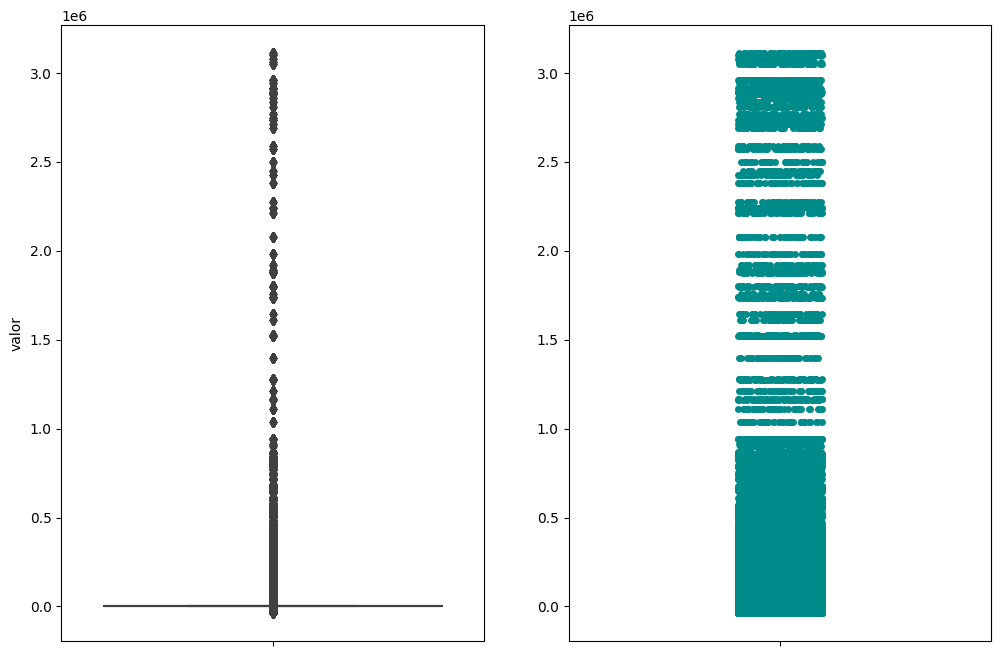

In [21]:
plot_num(energia_teste, 'valor')

Produtos refinados e eletricidade são energias secundárias, produção é igual a 0.
O valor negativo representa uma entrada, valor negativo representa uma saída.


In [22]:
energia_teste1 = energia_teste[energia_teste.valor < 200000 ]

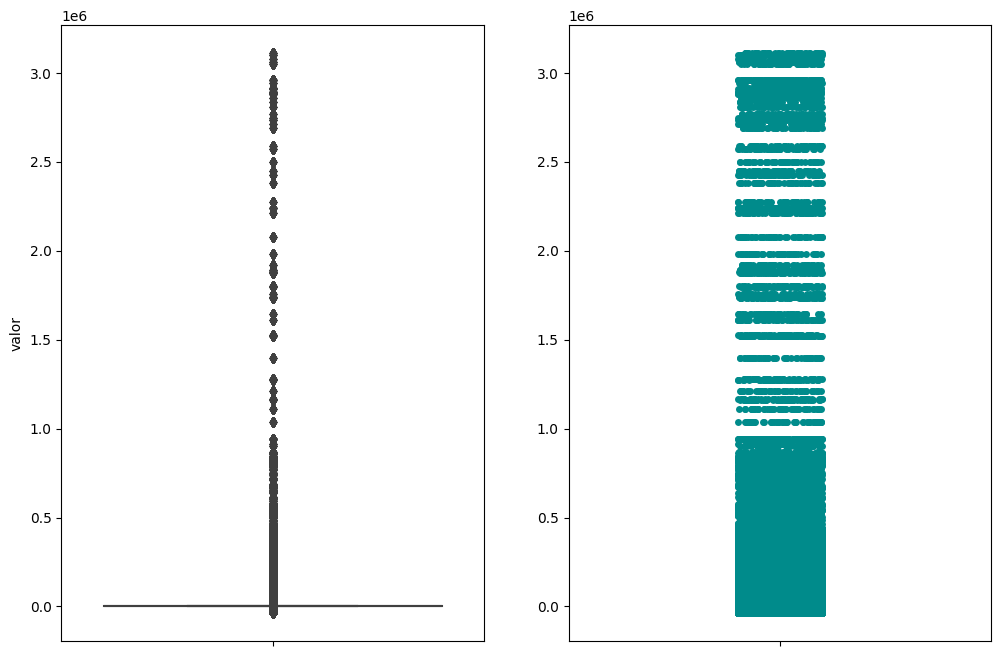

In [23]:
plot_num(energia_teste, 'valor')

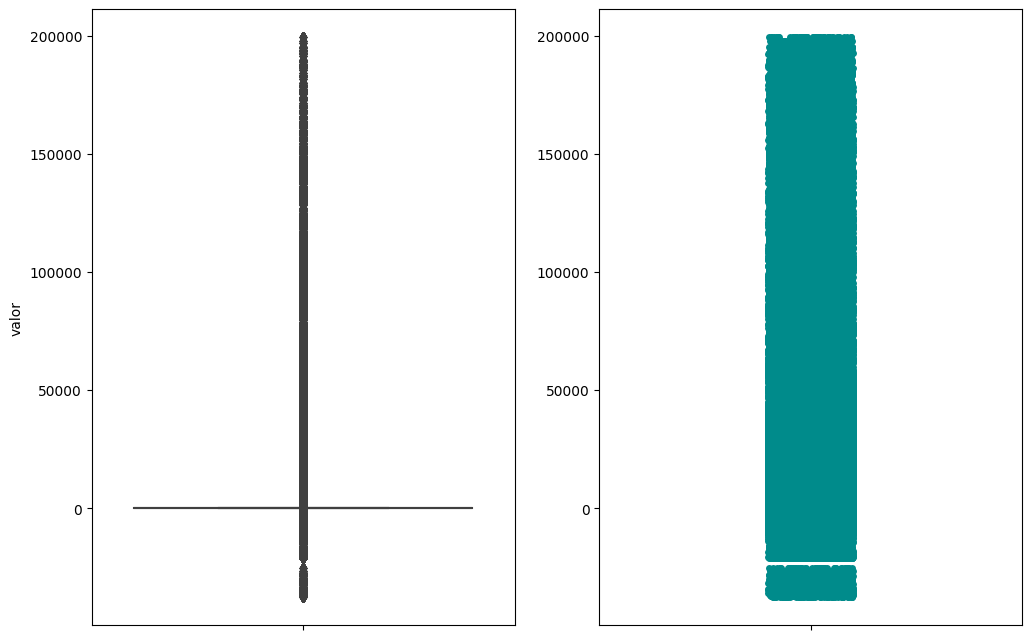

In [24]:
plot_num(energia_teste1, 'valor')

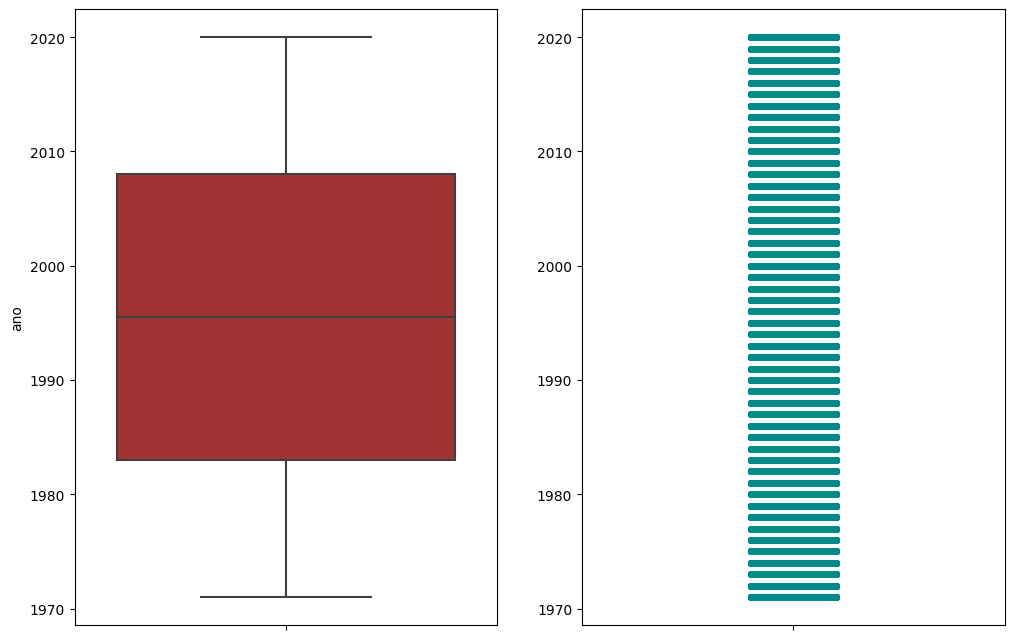

In [25]:
plot_num(energia_teste, 'ano')

In [ ]:
##energia_teste2 = energia_teste[energia_teste.ano > 2010]

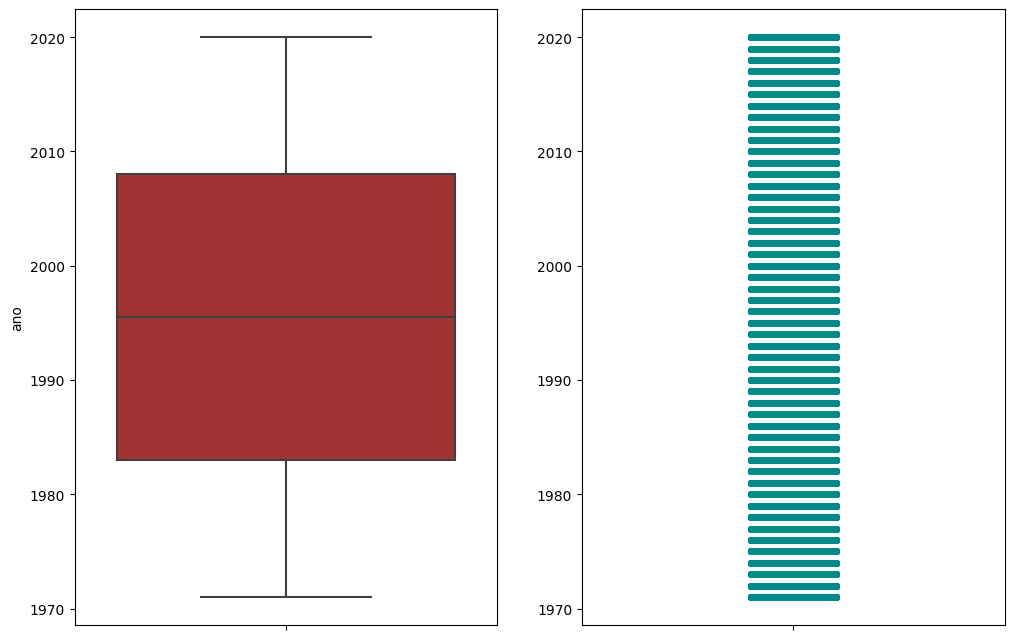

In [26]:
plot_num(energia_teste, 'ano')

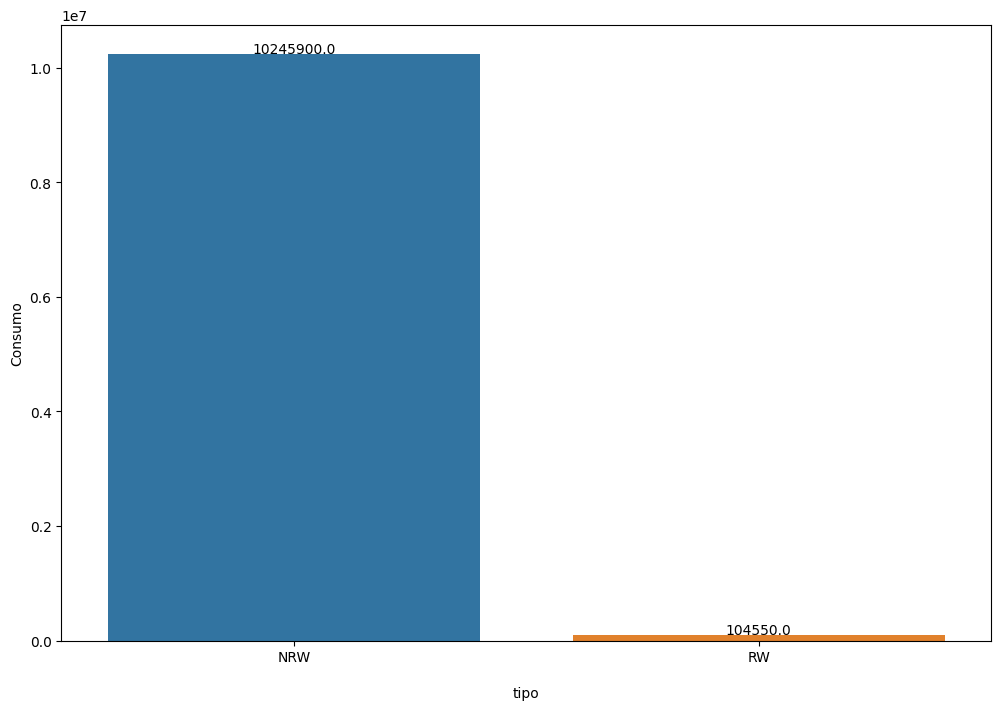

In [28]:
plot_cat(energia_teste, 'tipo')

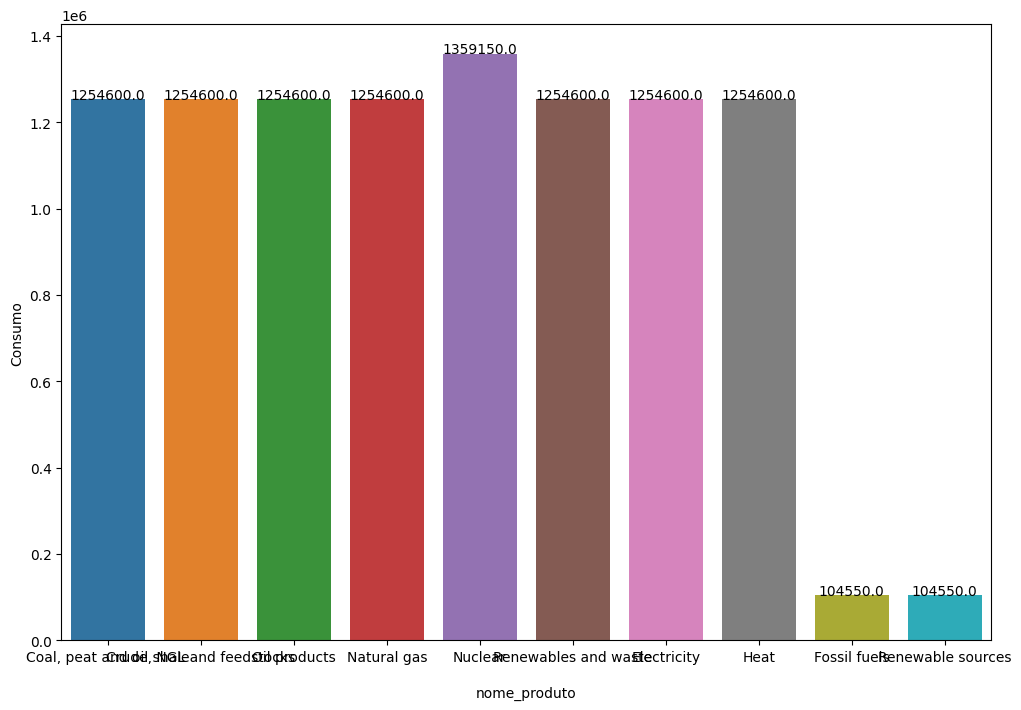

In [29]:
plot_cat(energia_teste, 'nome_produto')

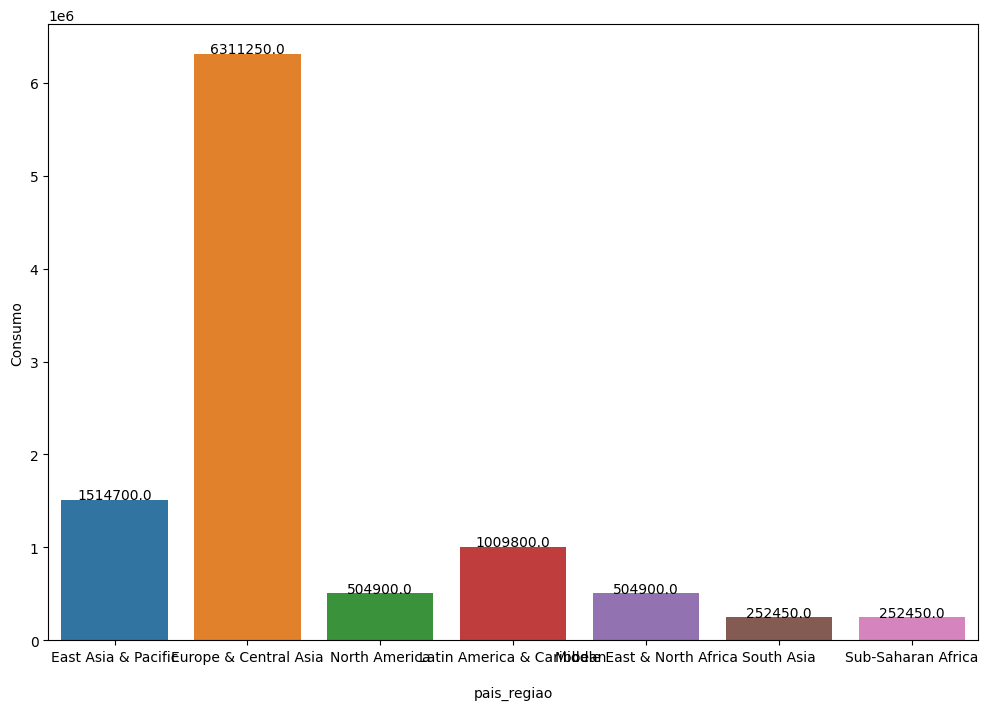

In [30]:
plot_cat(energia_teste, 'pais_regiao')

In [31]:
energia_teste.valor.min()

-37637.08051

In [32]:
energia_teste.valor.max()

3111787.0

In [33]:
energia_teste.ano.min()

1971

In [34]:
energia_teste.ano.max()

2020

In [35]:
produtos = tb_final_energia[['fk_produto','tipo','nome_produto', 'nome_setor', 'pais_bloco','valor']]

In [36]:
show_null(produtos)

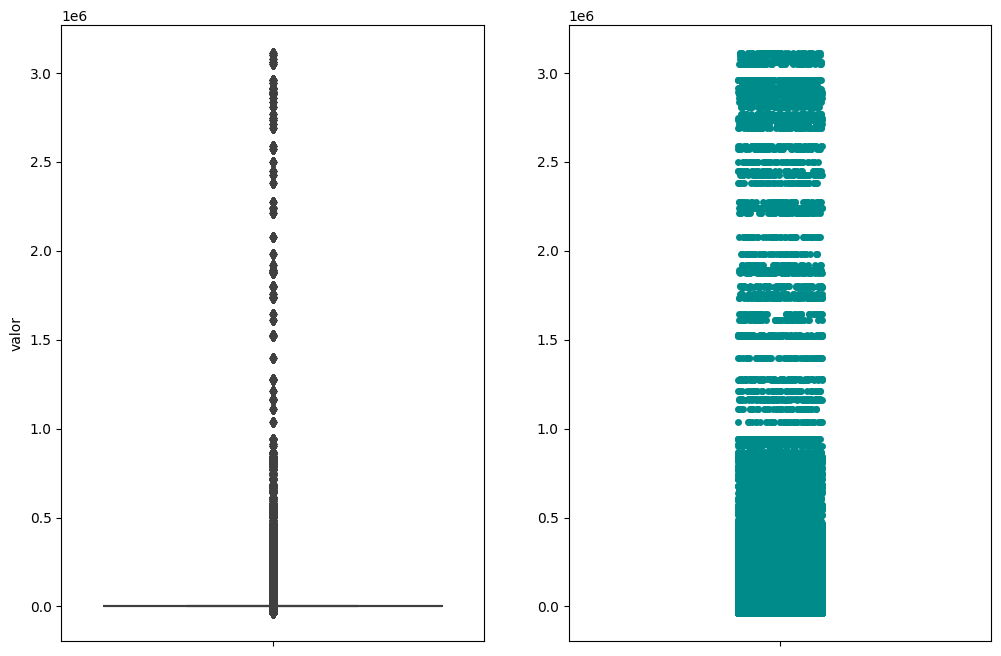

In [37]:
plot_num(produtos, 'valor')